Orginal cities {(0.9020671533172102, 0.6642546213670487), (0.18800258047062213, 0.6492500540300038), (0.18254299656442344, 0.6408840566990613), (0.8965593442714473, 0.6594808415633028), (0.07715723487759439, 0.4217346746810685), (0.9100395467868019, 0.6729072766951432), (0.8992383903649425, 0.6726042328234112), (0.5705948721766698, 0.37713077483612517), (0.1511475689012871, 0.7527689044908252), (0.5444750509523272, 0.3697945967147713), (0.529665522918476, 0.3642416859996483), (0.18558441168978582, 0.655317213883936), (0.9158302007582655, 0.6649329332332686), (0.06550445982878618, 0.40738871670774557), (0.567646067980425, 0.368525716656119), (0.5725157108888822, 0.36354011913236123), (0.0821524676065419, 0.4285494290505468), (0.14793415482286534, 0.7464342078026975), (0.5490550760518548, 0.3859723715394388), (0.14474923238216186, 0.7669863005481693), (0.13797925411315753, 0.7454461014501561), (0.13780476747632692, 0.7414248102478577), (0.08441177276701338, 0.4220760173263834), (0.183234

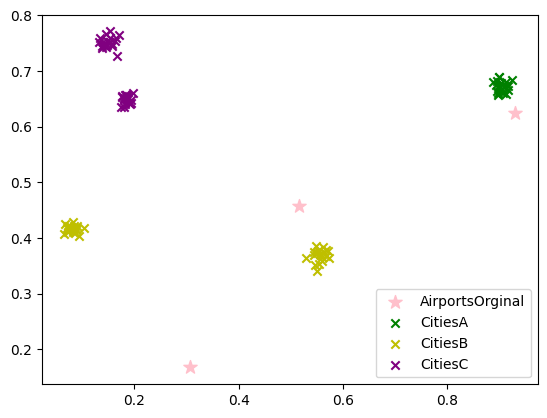

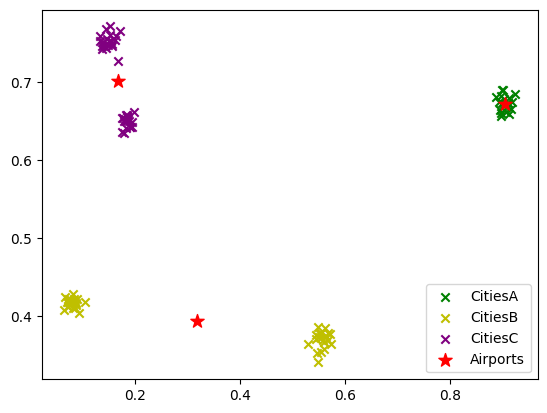

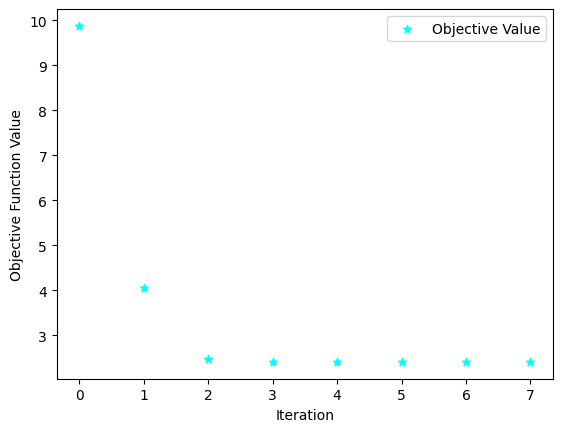

In [9]:
import math
import random
import numpy as np


def findClosestCity(cities, airports, cityA, cityB, cityC):

    #Empty sets
    cityA.clear()
    cityB.clear()
    cityC.clear()

    #For all cities
    for city in cities:

        cityXCord = city[0]
        cityYCord = city[1]
        distance = 100000000
        airportNum = -1

        #For each airport see which is closest to city
        for i in range (num_air):

            airportXCord = airports[i][0]
            airportYCord = airports[i][1]

            #Distance formula
            tempCal = math.sqrt( (airportXCord - cityXCord)**2 + (airportYCord - cityYCord)**2 )

            #Found an airport closer to city
            if(tempCal < distance):
                distance = tempCal
                airportNum = i


        if(airportNum == 0):
            cityA.add(city)

        if(airportNum == 1):
            cityB.add(city)

        if(airportNum == 2):
            cityC.add(city)


#Calculates the objective funciton value
def objectiveFunct(closeCityList, airports):
    totalDistance = 0

    #For each airport
    for i in range(len(airports)):

        airportXCord = airports[i][0]
        airportYCord = airports[i][1]


        #For each set of cities closest to an airport
        for city in closeCityList[i]:
            cityXCord = city[0]
            cityYCord = city[1]

            x = (airportXCord - cityXCord)**2
            y = (airportYCord - cityYCord)**2
            totalDistance = totalDistance + x + y


    return totalDistance


num_city = 100
num_air = 3
num_center = 5
#sigma = 0.1
sigma = 0.01
#sigma = 0.05
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))


for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y))


#Create set of cities for closest airport
cityA = set()
cityB = set()
cityC = set()

closeCityList = []
closeCityList.append(cityA)
closeCityList.append(cityB)
closeCityList.append(cityC)

#findClosestCity(cities, airports, cityA, cityB, cityC)
#val = objectiveFunct(closeCityList, airports)
#print('obj val: ', val)

#Array of the objective values calculated
objVals = []
prevObjVal = 10000

#Hold orginal airport locations
temp1 = airports[0]
temp2 = airports[1]
temp3 = airports[2]
airportOrgin = []
airportOrgin.append(temp1)
airportOrgin.append(temp2)
airportOrgin.append(temp3)


#Check the objective function value changes
change = 10
iteration = 0

print('Orginal cities', cities)
print('Orginal airports: ', airports)

#Repeat objective function till minimal change
while (change > 0.0001):

    #Group together cities closest to a specific airport
    findClosestCity(cities, airports, cityA, cityB, cityC)
    print('length of cityA', len(cityA))

    #Calculate objective function value
    val = objectiveFunct(closeCityList, airports)
    objVals.append((iteration, val))
    iteration = iteration + 1

    #Check to see if converge to solution
    change = abs(val - prevObjVal)
    prevObjVal = val

    #For each airport
    for i in range(len(airports)):
        airportXCord = airports[i][0]
        airportYCord = airports[i][1]

        #Calculate summations for each individual city and individual axis
        summationX = 0
        summationY = 0

        #For each city closest to a particular airport
        for city in closeCityList[i]:
            cityXCord = city[0]
            cityYCord = city[1]

            summationX = summationX + (airportXCord - cityXCord)
            summationY = summationY + (airportYCord - cityYCord)

        #After completing summations, multiply by 2 for partial derivatives
        gradientX = summationX * 2
        gradientY = summationY * 2
        #print('PREgradients for airport ', i , ' ', gradientX, gradientY)

        #Multiply with small constant
        gradientX = gradientX * sigma
        gradientY = gradientY * sigma

        #Possible Test
        #gradientX = airportXCord * gradientX
        #gradientY = airportYCord * gradientY

        print('gradients for airport ', i , ' ', gradientX, gradientY)
        #airports[i] = (gradientX, gradientX)

        #Update location of airport
        newLocX = airportXCord - gradientX
        newLocY = airportYCord - gradientY
        airports[i] = (newLocX, newLocY)

    print('airports: ', airports)


    #if(iteration == 10):
        #change = 0



findClosestCity(cities, airports, cityA, cityB, cityC)
val = objectiveFunct(closeCityList, airports)
print(val)


print ('final airport cords', airports)
print('final cities:',cities)
print('cityA: ', cityA)
print('cityB: ', cityB)
print('cityC: ', cityC)

#for i in range(len(airports)):
    #tempX = round(airports[i][0], 5)
    #tempY = round(airports[i][1], 5)
    #airports[i] = (tempX, tempY)

#print ('final airport cords', airports)

import matplotlib.pyplot as plt


#Orginal state
plt.figure(3)
zip_airsOrgin = zip(*airportOrgin)
plt.scatter(*zip_airsOrgin, marker='*', color='pink', s=100, label='AirportsOrginal')

zip_citiesA = zip(*cityA)
plt.scatter(*zip_citiesA, marker='x',color='green', label='CitiesA')

zip_citiesB = zip(*cityB)
plt.scatter(*zip_citiesB, marker='x',color='y', label='CitiesB')

zip_citiesC = zip(*cityC)
plt.scatter(*zip_citiesC, marker='x',color='purple', label='CitiesC')

#zip_cities = zip(*cities)
#plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
plt.legend()

#Plot figure for locations
plt.figure(1)
zip_citiesA = zip(*cityA)
plt.scatter(*zip_citiesA, marker='x',color='green', label='CitiesA')

zip_citiesB = zip(*cityB)
plt.scatter(*zip_citiesB, marker='x',color='y', label='CitiesB')

zip_citiesC = zip(*cityC)
plt.scatter(*zip_citiesC, marker='x',color='purple', label='CitiesC')

#zip_cities = zip(*cities)
#plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')

#zip_airsOrgin = zip(*airportOrgin)
#plt.scatter(*zip_airsOrgin, marker='*', color='pink', s=100, label='AirportsOrginal')
#plt.scatter(airports[0][0], airports[0][1], marker='*', color='blue', s=100, label='AirportsA')
plt.legend()


#Plot figure for objective values
plt.figure(2)
zip_objFuncVal = zip(*objVals)
plt.scatter(*zip_objFuncVal, marker='*',color='cyan', label='Objective Value')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')


plt.legend()
